In [1]:
%matplotlib inline
from neural_network import Network, Layer
from keras.datasets import mnist
from random import randrange
import matplotlib.pyplot as plt
import numpy as np

2023-12-12 13:04:59.412014: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Setup 
First, we create a neural network by instantiating a new neural network object and loading in the data. 

### Creating the network
Currently, we only have support for a dense neural network, and we can only use the sigmoid activation function.
Networks can contain any numbers of hidden layers with any number of nodes.

### Importing the data
For this example, we are going to use the MNIST data set to classify handwritten digits. MNIST contains 70,000 28 x 28 images of handwritten digits: 60,000 for training and 10,000 for testing.

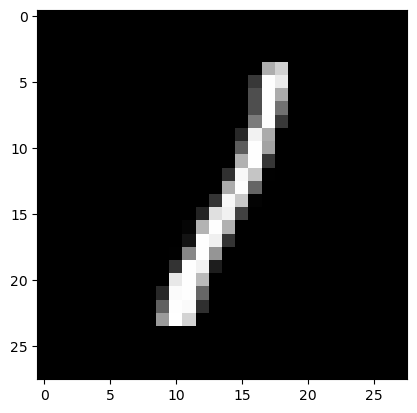

This image is a 1.


In [10]:
model = Network(layers=[Layer(784, 'sigmoid'),
                        Layer(64, 'sigmoid'),
                        Layer(64, 'sigmoid'),
                        Layer(10, 'sigmoid')])

(x_train, y_train), (x_test, y_test) = mnist.load_data()
digit = randrange(1, 60000)
plt.imshow(x_train[digit], cmap='gray', vmin=0, vmax=255)
plt.show()
print(f"This image is a {y_train[digit]}.")

# Finishing Setup

We are going to initialize our training sample size for standard gradient descent using the MSE loss function.

In [11]:
model.set_training_size(8000)

# Training
Next we train the network. The model will output the average loss for every 1000 training examples.

In [12]:
model.train()

Loss: 0.8878085913930925
Loss: 0.37342134851361297
Loss: 0.26236121416691693
Loss: 0.21930759730388472
Loss: 0.1829583110629389
Loss: 0.1617845038400465
Loss: 0.14579474379218035


# Testing
Next we are going to test the model will all 10,000 test examples.

In [15]:
correct = 0

for index in range(x_test.shape[0]):
    prediction = model.predict(x_test[index].flatten())
    if prediction.argmax() == y_test[index]:
        correct += 1
        
print(f"When training with {model.get_training_size()} examples, "
      f"our model's accuracy is {correct / y_test.shape[0]}.")


When training with 8000 examples, our model's accuracy is 0.8495.


Our model predicts a 2. The label is 2.
[0.00010521]
[4.82711574e-05]
[0.99995909]
[1.41034678e-06]
[1.24741663e-10]
[4.78915513e-08]
[0.00111961]
[2.37362899e-07]
[1.27126398e-05]
[9.36731535e-07]
The model predicts this is a 2
The propabilities are None


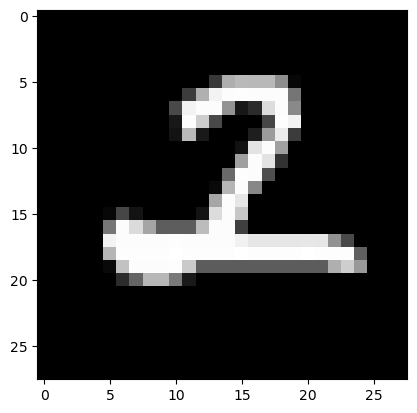

In [17]:
i = randrange(10000)

prediction = model.predict(x_test[i].flatten()).argmax()

print(f"Our model predicts a {prediction}. The label is {y_test[i]}.")
print(f"The propabilities are {model.display_output()}")
plt.imshow(x_test[i], cmap='gray', vmin=0, vmax=255)